### Cust_Spend_Data.csv 파일을 통해서 고객의 의류소비, 음료소비, 음식소비 대이터를 통해서 비슷한 고객으로 그루핑 하자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('Cust_Spend_Data.csv')

In [5]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [8]:
X = df.iloc[:, 2:]

feature Scaling (택1)

MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
mm = MinMaxScaler()

In [ ]:
#X = mm.fit_transform(X)

StandardScaler

In [10]:
sc = StandardScaler()

In [12]:
X = sc.fit_transform(X)

dendrogram하기위한 라이브러리 

import scipy.cluster.hierarchy

In [15]:
import scipy.cluster.hierarchy as sch

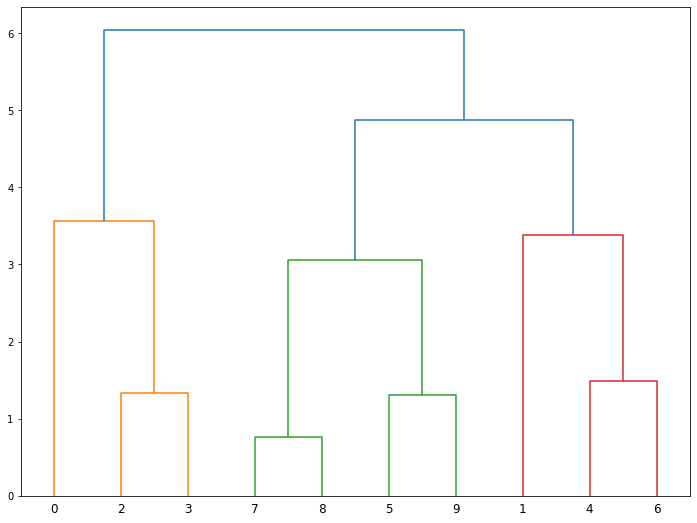

In [17]:
plt.figure(figsize=(12,9))
sch.dendrogram( sch.linkage(X, method='ward') ) 
plt.show()


In [ ]:
# 3개?

hierarchical clustering 학습

In [18]:
from sklearn.cluster import AgglomerativeClustering

dendrogram으로 나온 결과로 n_clusters= 파라미터 설정

In [19]:
# 위에서 dendrogram으로 나온 결과를 n_clusters= 몇개를 넣어줄 지 결정 후 
# 객체 생성
hc = AgglomerativeClustering( n_clusters=3, linkage='ward')

In [22]:
# 예측
y_pred_hc = hc.fit_predict(X)

In [23]:
y_pred_hc

array([0, 1, 0, 0, 1, 2, 1, 2, 2, 2], dtype=int64)

In [24]:
df['Group'] = y_pred_h기

In [25]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group
0,1,A,10000,2,1,1,0,0
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,0
3,4,D,6500,5,1,1,4,0
4,5,E,6000,6,0,12,3,1


In [26]:
# 클러스터 된 1로 분류된 것만 찾기
df.loc[ df['Group'] == 1, ]

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group
1,2,B,7000,3,0,10,9,1
4,5,E,6000,6,0,12,3,1
6,7,G,2500,5,0,11,2,1


In [31]:
X

array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

In [32]:
y_pred_hc

array([0, 1, 0, 0, 1, 2, 1, 2, 2, 2], dtype=int64)

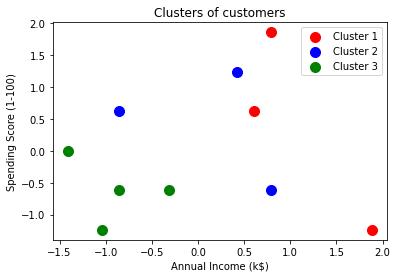

In [29]:
# X 1번째컬럼, X의 3번째 컬럼
# numpy 문법으로 만들어져서 이렇게 되어 있음
# pandas이면 X.loc[, ] 이런식으로 가져와야함
# 그래서 위에서 X 값을 X = X.valuse 로 넣어줘서 ndarray로 만든 것임
# X를 values값으로 안 넣어주고 판다스 그대로 한다면 하는 방법 한번 해보기
plt.scatter(X[y_pred_hc == 0, 0], X[y_pred_hc == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred_hc == 1, 0], X[y_pred_hc == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred_hc == 2, 0], X[y_pred_hc == 2, 2], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()